In [53]:
import pandas as pd
import requests
from bs4  import BeautifulSoup
import datetime as dt
import seaborn as sns

In [3]:
import matplotlib as plt

In [5]:
html_data=requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm')

In [6]:
soup = BeautifulSoup(html_data.content,'html.parser')


In [7]:
tables = soup.find_all('table')
for index, table in enumerate(tables):
    if ('Tesla Quarterly Revenue') in str(table):
        print(index)

1


In [8]:
tesla_revenue = pd.DataFrame(columns =['Date','Revenue'])
tesla_revenue

,Date,Revenue


In [13]:
for row in tables[1].find_all('tr'):
    cols = row.find_all('td')
    if cols!=[]:
        date=cols[0].text
        revenue=cols[1].text
        tesla_revenue=pd.concat([tesla_revenue,pd.DataFrame({'Date':[date],'Revenue':revenue})])


In [15]:
tesla_revenue

,Date,Revenue
0,2022-09-30,"$21,454"
0,2022-06-30,"$16,934"
0,2022-03-31,"$18,756"
0,2021-12-31,"$17,719"
0,2021-09-30,"$13,757"
0,2021-06-30,"$11,958"
0,2021-03-31,"$10,389"
0,2020-12-31,"$10,744"
0,2020-09-30,"$8,771"
0,2020-06-30,"$6,036"


In [17]:
#removing the comma and dollar sign from the Revenue column.
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$','',regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Mithunsomu\AppData\Local\Temp\ipykernel_8088\1702307039.py:2: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$','',regex=True)


In [19]:
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
0,2022-06-30,16934
0,2022-03-31,18756
0,2021-12-31,17719
0,2021-09-30,13757
0,2021-06-30,11958
0,2021-03-31,10389
0,2020-12-31,10744
0,2020-09-30,8771
0,2020-06-30,6036


In [21]:
#removing an null or empty strings in the Revenue column.
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue']!='']

In [45]:
tesla_revenue['year'] = pd.to_datetime(tesla_revenue['Date']).dt.year

C:\Users\Mithunsomu\AppData\Local\Temp\ipykernel_8088\1046928005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue['year'] = pd.to_datetime(tesla_revenue['Date']).dt.year


In [63]:
tesla_revenue['month'] = pd.to_datetime(tesla_revenue['Date']).dt.month

C:\Users\Mithunsomu\AppData\Local\Temp\ipykernel_8088\2255761646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue['month'] = pd.to_datetime(tesla_revenue['Date']).dt.month


In [71]:
tesla_revenue['Revenue']= tesla_revenue['Revenue'].astype('int32')

C:\Users\Mithunsomu\AppData\Local\Temp\ipykernel_8088\3822450613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue['Revenue']= tesla_revenue['Revenue'].astype('int32')


<Axes: >

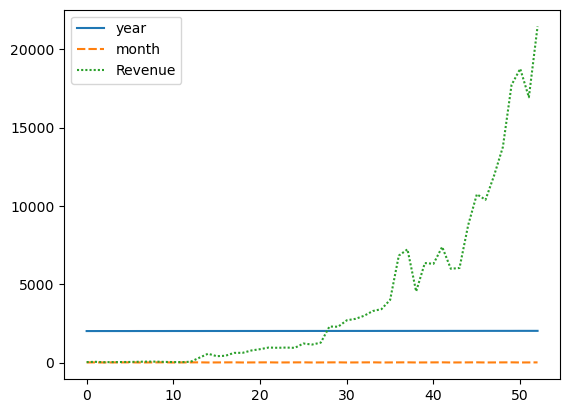

In [73]:
revenue_over_years = tesla_revenue.groupby(['year','month']).agg({'Revenue':'mean'}).reset_index()
sns.lineplot(data = revenue_over_years)

In [81]:
tesla_revenue

,Date,Revenue,year,month
0,2022-09-30,21454,2022,9
0,2022-06-30,16934,2022,6
0,2022-03-31,18756,2022,3
0,2021-12-31,17719,2021,12
0,2021-09-30,13757,2021,9
0,2021-06-30,11958,2021,6
0,2021-03-31,10389,2021,3
0,2020-12-31,10744,2020,12
0,2020-09-30,8771,2020,9
0,2020-06-30,6036,2020,6


<Axes: xlabel='year', ylabel='Revenue'>

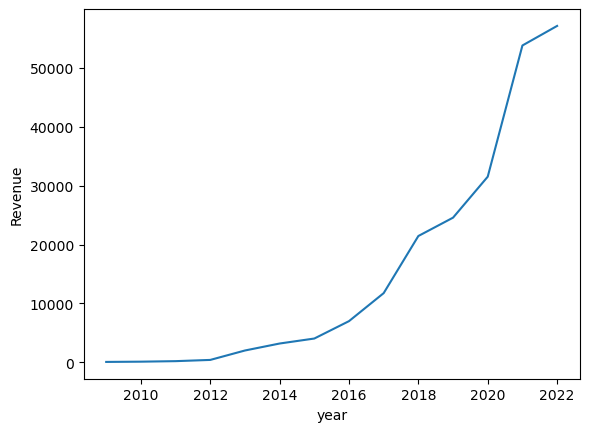

In [87]:
revenue_over_years = tesla_revenue.groupby(['year'])['Revenue'].sum().reset_index()
sns.lineplot(data = revenue_over_years,x='year',y='Revenue')


<Axes: >

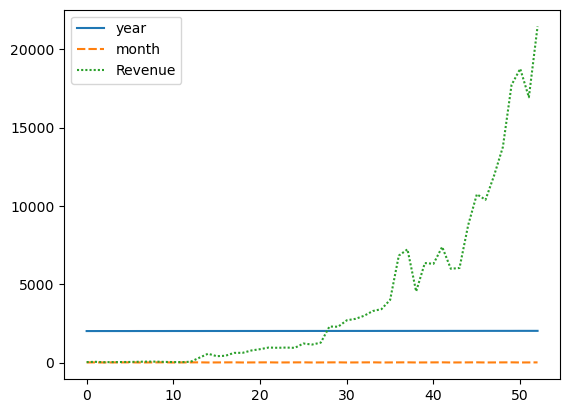

In [95]:
d = tesla_revenue.groupby(['year','month']).agg({'Revenue':'mean'}).reset_index()
sns.lineplot(d)